In [3]:
from PIL import Image
import os.path, sys

pathin = "/Users/miroslav.polacek/Documents/Process"
pathout = "/Users/miroslav.polacek/Documents/ToAnnotate"

#pathin = "/Volumes/swarts/lab/DendroImages/00008JPEG"
#pathout = "/Volumes/swarts/lab/DendroImages/ToAnnotate"


for f in os.listdir(pathin):
    if f.endswith('jpg'):
        print(f)
        im = Image.open(os.path.join(pathin,f))               
        imgwidth, imgheight = im.size
    
        for i in range(0,imgwidth, imgheight):
            box = (i, 0, i+imgheight, imgheight)
            a = im.crop(box)
            a.save(os.path.join(pathout, str(i)+ '_' + f))
            

New-04(3)-Image Export-08.jpg


New-04(3)-Image Export-08.jpg


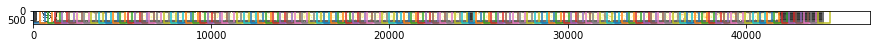

In [79]:
# Try with overlap

from PIL import Image
import os.path, sys
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import box

pathin = "/Users/miroslav.polacek/Documents/Process"
pathout = "/Users/miroslav.polacek/Documents/ToAnnotate"

#pathin = "/Volumes/swarts/lab/DendroImages/00008JPEG"
#pathout = "/Volumes/swarts/lab/DendroImages/ToAnnotate"

overlap = 0.4 
plt.figure(figsize = (15, 18))

for f in os.listdir(pathin):
    if f.endswith('jpg'):
        print(f)
        im = Image.open(os.path.join(pathin,f))
        plt.imshow(im) #to plot an image that is being processed
        imgwidth, imgheight = im.size
    
        for i in range(0,imgwidth, int(imgheight-(imgheight*overlap))):
            b = (i, 0, (i+imgheight), imgheight)
            bplot = box(*b) #next 3 rows from here i just try to plot box on the image
            x,y = bplot.exterior.xy
            plt.plot(x,y)
            a = im.crop(b)
            a.save(os.path.join(pathout, str(i)+ '_' + f))

In [80]:
from PIL import Image
import os.path, sys
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import box

pathin = "/Users/miroslav.polacek/Documents/Process"
pathout = "/Users/miroslav.polacek/Documents/ToAnnotate"
#pathin = "/Volumes/swarts/lab/DendroImages/00008JPEG"
#pathout = "/Volumes/swarts/lab/DendroImages/ToAnnotate"

def CutTrain(pathin = pathin, pathout = pathout, overlap = 0):
    
    plt.figure(figsize = (15, 18)) #set the size of the plot, not sure if usefull here

    for f in os.listdir(pathin):
        if f.endswith('jpg'):
            print(f)
            im = Image.open(os.path.join(pathin,f))
            plt.imshow(im) #to plot an image that is being processed
            imgwidth, imgheight = im.size
    
            for i in range(0,imgwidth, int(imgheight-(imgheight*overlap))):
                b = (i, 0, (i+imgheight), imgheight)
                bplot = box(*b) #next 3 rows from here i just try to plot box on the image
                x,y = bplot.exterior.xy
                plt.plot(x,y)
                a = im.crop(b)
                a.save(os.path.join(pathout, str(i)+ '_' + f))
